In [32]:
import os
import sys

sys.path.append(os.path.join('..'))
from models import *
import activation_functions
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


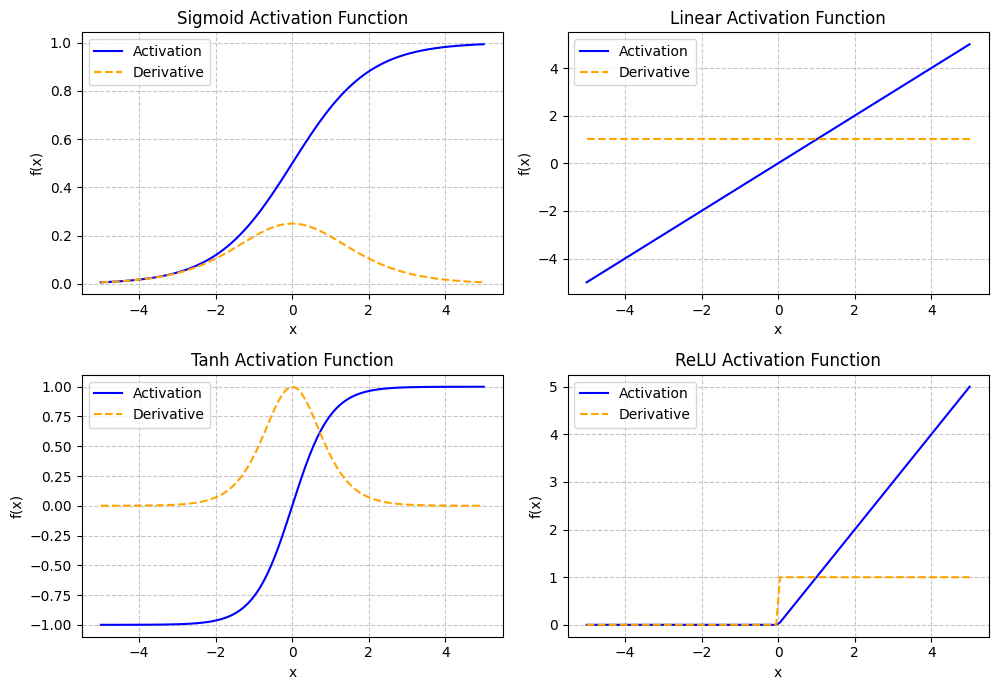

In [33]:
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
activation_functions.test(Sigmoid(), final=False)
plt.subplot(2, 2, 2)
activation_functions.test(Linear(), final=False)
plt.subplot(2, 2, 3)
activation_functions.test(Tanh(), final=False)
plt.subplot(2, 2, 4)
activation_functions.test(ReLU(), final=False)
plt.tight_layout()

In [34]:
neuron_count = 80
neurons_in = 1
neurons_out = 1
architectures = [
    MLPArchitecture(neurons_in, [neuron_count], neurons_out),
    MLPArchitecture(neurons_in, [int(neuron_count/2), int(neuron_count/2)], neurons_out),
    MLPArchitecture(neurons_in, [int(neuron_count/4), int(neuron_count/2), int(neuron_count/4)], neurons_out),
]

for architecture in architectures:
    print(architecture)

Architecture:
1 -> [80] -> 1
Architecture:
1 -> [40, 40] -> 1
Architecture:
1 -> [20, 40, 20] -> 1


In [35]:
activation_functions = [
    Sigmoid(),
    Linear(),
    Tanh(),
    ReLU(),
]

# Testing for 80 neurons distributed across 1 - 3 layers
### 3 architectures:
 - `1 -> [80] -> 1`
 - `1 -> [40, 40] -> 1`
 - `1 -> [20, 40, 20] -> 1`
### 4 activation functions:
- `Sigmoid`
- `Linear`
- `Tanh`
- `ReLU`

### For multimodal-large dataset

In [ ]:
models = []
for architecture in architectures:
    for activation_function in activation_functions:
        print('-' * 50)
        print(f'Architecture: {architecture}, Activation function: {activation_function}')
        print('-' * 50)

        model = MLP(
            architecture=architecture,
            dataset_name='multimodal-large',
            data_dir='../data',
            activation_func=activation_function,
            initializer=XavierUniformInitializer(),
            name=architecture.__str__().split("\n")[1] + ' - ' + activation_function.__str__(),
        )
        model.train(
            epochs=15,
            learning_rate=0.1,
            batch=True,
            batch_size=64,
            optimizer="rmsprop",
            rms_beta=0.9,
            save_till_best=True,
        )
        # model.plot()
        # model.plot()
        model.plot_fit_and_history()
